# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [126]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [127]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "drive/My Drive/hybrid/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [128]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [129]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

cat_file = datadir + 'cat.jpg'
hermione_file = datadir + 'hermione.jpg'

cheese_file = datadir + 'cheese.jpg'
tinky_file = datadir + 'tinky.jpg'

rapunzel_file = datadir + 'rapunzel.jpg'
flynn_file = datadir + 'flynn.jpg'

flash_file = datadir + 'flash.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

cat_gray = np.float32(cv2.imread(cat_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# cat_gray = np.float32(cv2.imread(cat_file) / 255.0)
hermione_gray = np.float32(cv2.imread(hermione_file, cv2.IMREAD_GRAYSCALE) / 255.0)
# hermione_gray = np.float32(cv2.imread(hermione_file) / 255.0)

cheese_gray = np.float32(cv2.imread(cheese_file, cv2.IMREAD_GRAYSCALE) / 255.0)
tinky_gray = np.float32(cv2.imread(tinky_file, cv2.IMREAD_GRAYSCALE) / 255.0)

cheese_colored = cv2.imread(cheese_file)
cheese_colored = np.float32(cheese_colored / 255.0)

tinky_colored = cv2.imread(tinky_file)
tinky_colored = np.float32(tinky_colored / 255.0)

rapunzel_gray = np.float32(cv2.imread(rapunzel_file, cv2.IMREAD_GRAYSCALE) / 255.0)
flynn_gray = np.float32(cv2.imread(flynn_file, cv2.IMREAD_GRAYSCALE) / 255.0)


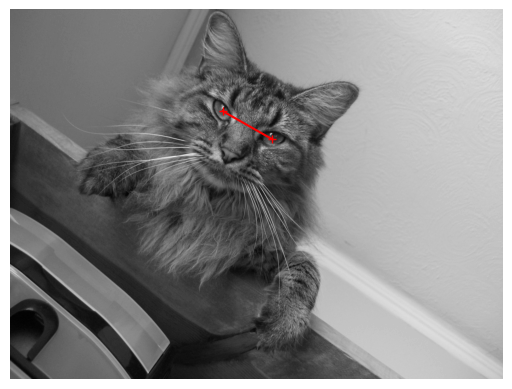

In [130]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

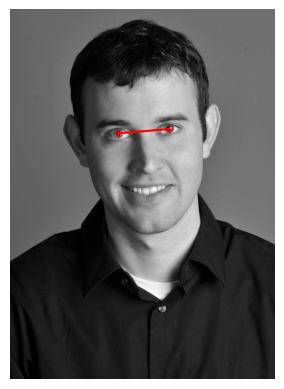

In [131]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

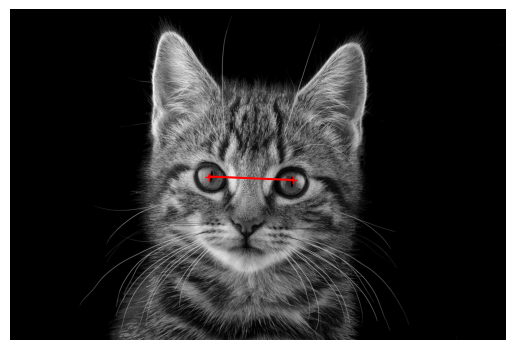

In [132]:
pts_cat_gray = utils.prompt_eye_selection(cat_gray)
pts_cat_gray = np.array([[850, 715], [1210, 730]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_cat_gray[:,0], pts_cat_gray[:,1], 'r-+')

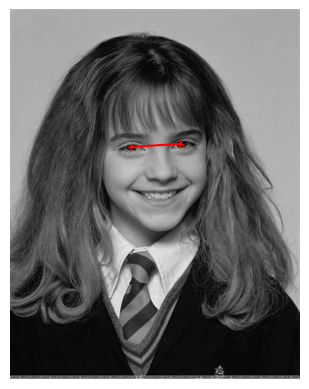

In [133]:
pts_hermione_gray = utils.prompt_eye_selection(hermione_gray)
pts_hermione_gray = np.array([[390, 445], [550, 435]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_hermione_gray[:,0], pts_hermione_gray[:,1], 'r-+')

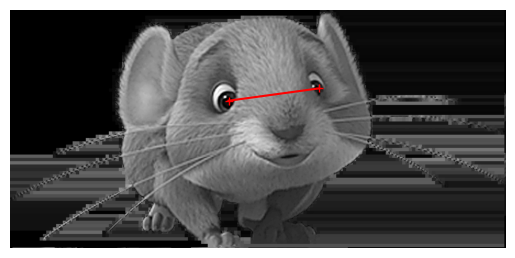

In [134]:
pts_cheese_gray = utils.prompt_eye_selection(cheese_gray)
pts_cheese_gray = np.array([[530, 220], [750, 190]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_cheese_gray[:,0], pts_cheese_gray[:,1], 'r-+')

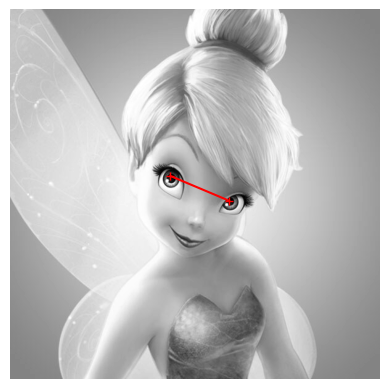

In [135]:
pts_tinky_gray = utils.prompt_eye_selection(tinky_gray)
pts_tinky_gray = np.array([[260, 270], [355, 310]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_tinky_gray[:,0], pts_tinky_gray[:,1], 'r-+')

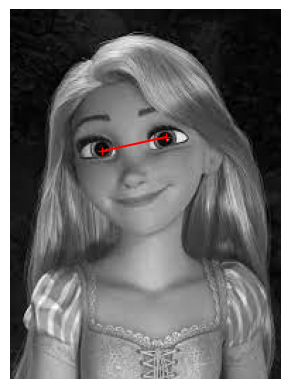

In [136]:
pts_rapunzel_gray = utils.prompt_eye_selection(rapunzel_gray)
pts_rapunzel_gray = np.array([[65, 100], [110, 90]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_rapunzel_gray[:,0], pts_rapunzel_gray[:,1], 'r-+')

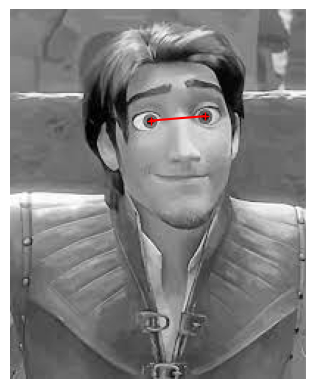

In [137]:
pts_flynn_gray = utils.prompt_eye_selection(flynn_gray)
pts_flynn_gray = np.array([[95, 75], [132, 72]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_flynn_gray[:,0], pts_flynn_gray[:,1], 'r-+')

In [138]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [139]:
cat_gray, hermione_gray = utils.align_images(cat_file, hermione_file, pts_cat_gray, pts_hermione_gray, save_images=False)
cheese_gray, tinky_gray = utils.align_images(cheese_file, tinky_file, pts_cheese_gray, pts_tinky_gray, save_images=False)
rapunzel_gray, flynn_gray = utils.align_images(rapunzel_file, flynn_file, pts_rapunzel_gray, pts_flynn_gray, save_images=False)
cheese_colored, tinky_colored = utils.align_images(cheese_file, tinky_file, pts_cheese_gray, pts_tinky_gray, save_images=False)


In [140]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

cat_gray = cv2.cvtColor(cat_gray, cv2.COLOR_BGR2GRAY) / 255.0
hermione_gray = cv2.cvtColor(hermione_gray, cv2.COLOR_BGR2GRAY) / 255.0

cheese_gray = cv2.cvtColor(cheese_gray, cv2.COLOR_BGR2GRAY) / 255.0
tinky_gray = cv2.cvtColor(tinky_gray, cv2.COLOR_BGR2GRAY) / 255.0

rapunzel_gray = cv2.cvtColor(rapunzel_gray, cv2.COLOR_BGR2GRAY) / 255.0
flynn_gray = cv2.cvtColor(flynn_gray, cv2.COLOR_BGR2GRAY) / 255.0

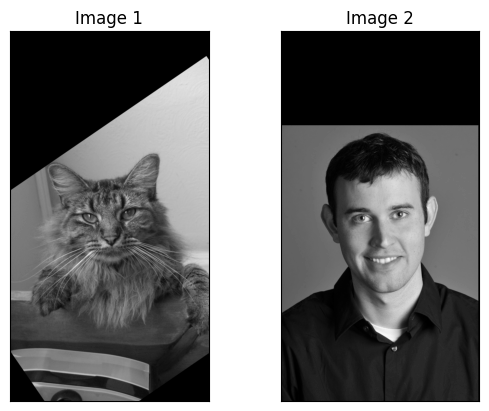

In [141]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

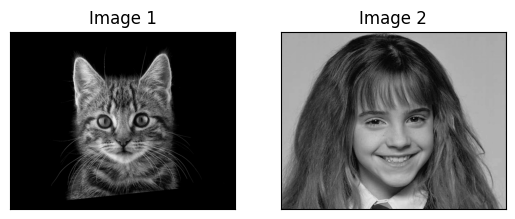

In [142]:
#Images sanity check (my images hermione + cat)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cat_gray,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hermione_gray,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

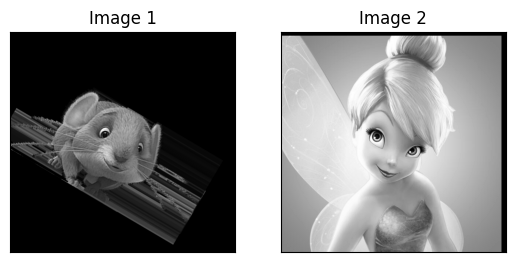

In [143]:
#Images sanity check (my images cheese + tinky)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(cheese_gray,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(tinky_gray,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

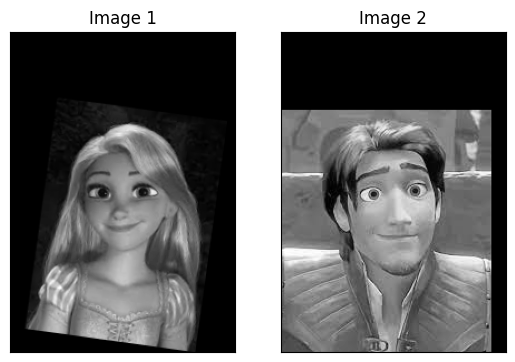

In [144]:
#Images sanity check (my images rapunzel + flynn)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(rapunzel_gray,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(flynn_gray,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [145]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter

    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''

    low_pass_filter = cv2.GaussianBlur(im1, (0, 0), sigma_low) # low pass gaussian blurr
    high_pass_filter = cv2.GaussianBlur(im2, (0, 0), sigma_high) # high pass
    high_pass = im2 - high_pass_filter # full image - the filter
    combined_image = low_pass_filter + high_pass # adding both images together

    # displaying all 5 images in a row
    fig, axes = plt.subplots(1, 5, figsize=(14, 7))
    axes[0].imshow(im1,cmap='gray')
    axes[0].set_title('Original Image 1  '), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(im2,cmap='gray')
    axes[1].set_title('Original Image 2 '), axes[1].set_xticks([]), axes[1].set_yticks([])
    axes[2].imshow(low_pass_filter,cmap='gray')
    axes[2].set_title('Low Pass Image 1 '), axes[2].set_xticks([]), axes[2].set_yticks([])
    axes[3].imshow(high_pass,cmap='gray')
    axes[3].set_title('High Pass Image 2  '), axes[3].set_xticks([]), axes[3].set_yticks([])
    axes[4].imshow(combined_image,cmap='gray')
    axes[4].set_title('Combined Image Final '), axes[4].set_xticks([]), axes[4].set_yticks([]);


    return combined_image
    # your code goes here






In [146]:
def displayFFT(im1, im2, sigma_low, sigma_high):

    low_pass_filter = cv2.GaussianBlur(im1, (0, 0), sigma_low) # low pass gaussian blurr
    high_pass_filter = cv2.GaussianBlur(im2, (0, 0), sigma_high) # high pass
    high_pass = im2 - high_pass_filter # full image - the filter
    combined_image = low_pass_filter + high_pass # adding both images together


    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(combined_image)))))
    plt.title('Hybrid')
    plt.axis('off')
    plt.show()


    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
    plt.title('Image 1 Original')
    plt.axis('off')
    plt.show()

    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
    plt.title('Image 2 Original')
    plt.axis('off')
    plt.show()

    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_filter)))))
    plt.title('Image 1 Filtered')
    plt.axis('off')
    plt.show()

    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))))
    plt.title('Image 2 Filtered')
    plt.axis('off')
    plt.show()


    return combined_image


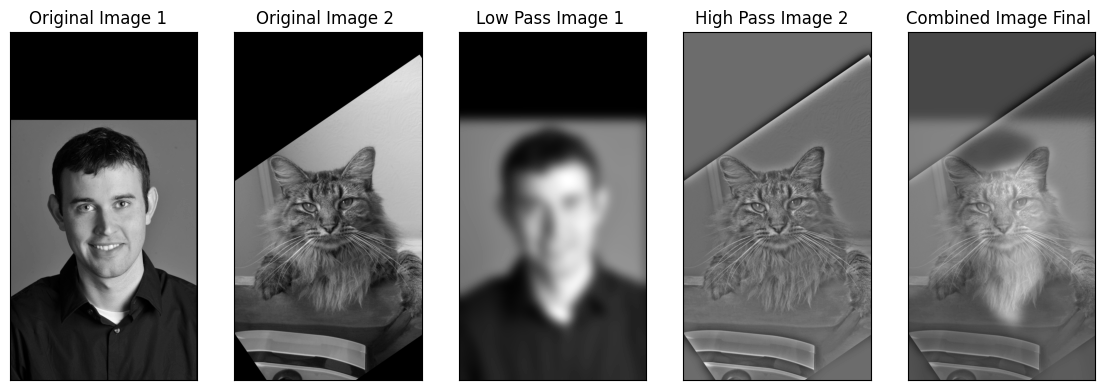

In [147]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

given_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


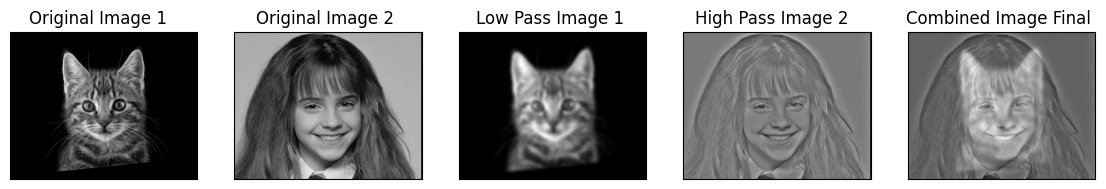

In [148]:
sigma_low = 7 # choose parameters that work for your images
sigma_high = 20

cat_hermione_hybrid = hybridImage(cat_gray, hermione_gray, sigma_low, sigma_high)


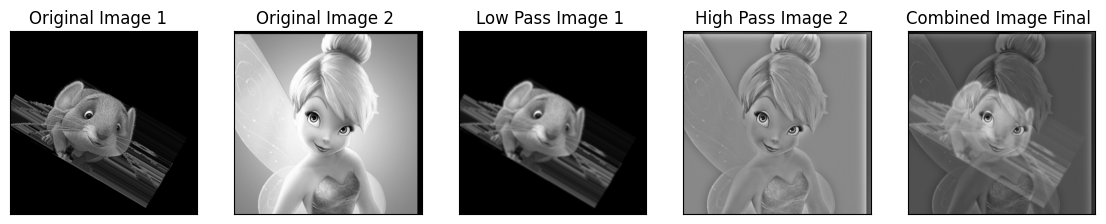

In [149]:
sigma_low = 2 # choose parameters that work for your images
sigma_high = 15

cheese_tinky_hybrid = hybridImage(cheese_gray, tinky_gray, sigma_low, sigma_high)

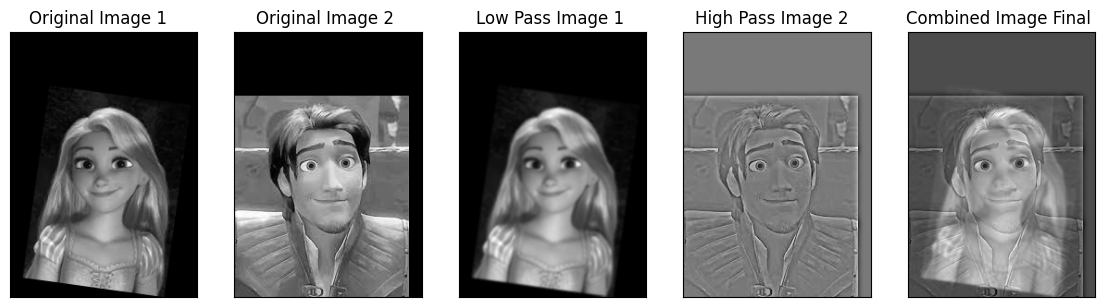

In [150]:
sigma_low = 1 # choose parameters that work for your images
sigma_high = 3

rapunzel_flynn_hybrid = hybridImage(rapunzel_gray, flynn_gray, sigma_low, sigma_high)

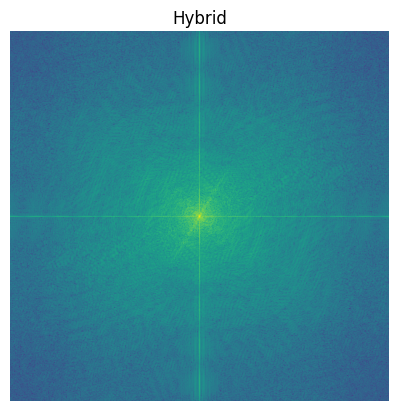

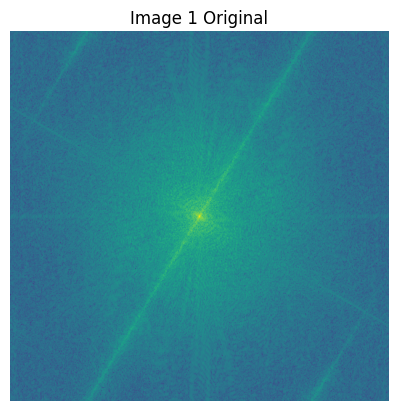

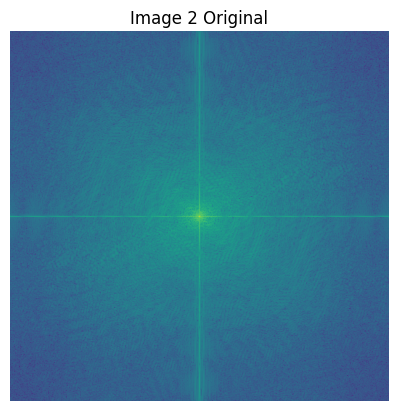

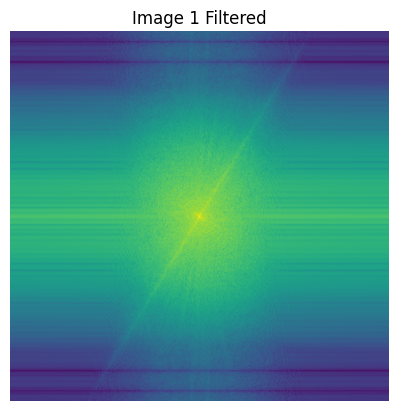

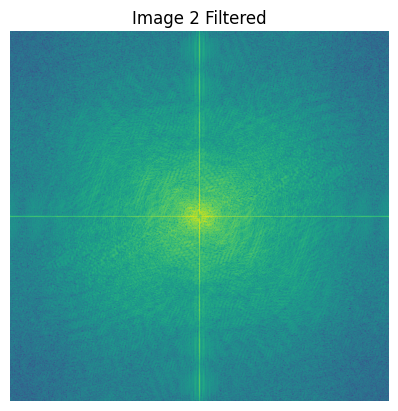

array([[-0.40432623, -0.40432984, -0.40434051, ..., -0.09208081,
        -0.09120515, -0.09091237],
       [-0.40504266, -0.40504627, -0.40505691, ..., -0.09224161,
        -0.09136442, -0.09107113],
       [-0.40718386, -0.40718744, -0.40719801, ..., -0.09272215,
        -0.09184039, -0.09154556],
       ...,
       [-0.0012195 , -0.00122475, -0.00124049, ..., -0.1750646 ,
        -0.17339803, -0.17284081],
       [-0.00120403, -0.00120926, -0.00122492, ..., -0.1750609 ,
        -0.1733944 , -0.1728372 ],
       [-0.00119888, -0.00120409, -0.00121973, ..., -0.17505968,
        -0.17339319, -0.172836  ]])

In [151]:
displayFFT(cheese_gray, tinky_gray, 2, 15) # FFT for MAIN example

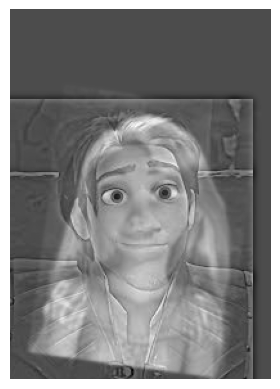

In [152]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
# cropped_object = utils.interactive_crop(cheese_tinky_hybrid)
# cropped_object = utils.interactive_crop(cat_hermione_hybrid)
cropped_object = utils.interactive_crop(rapunzel_flynn_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

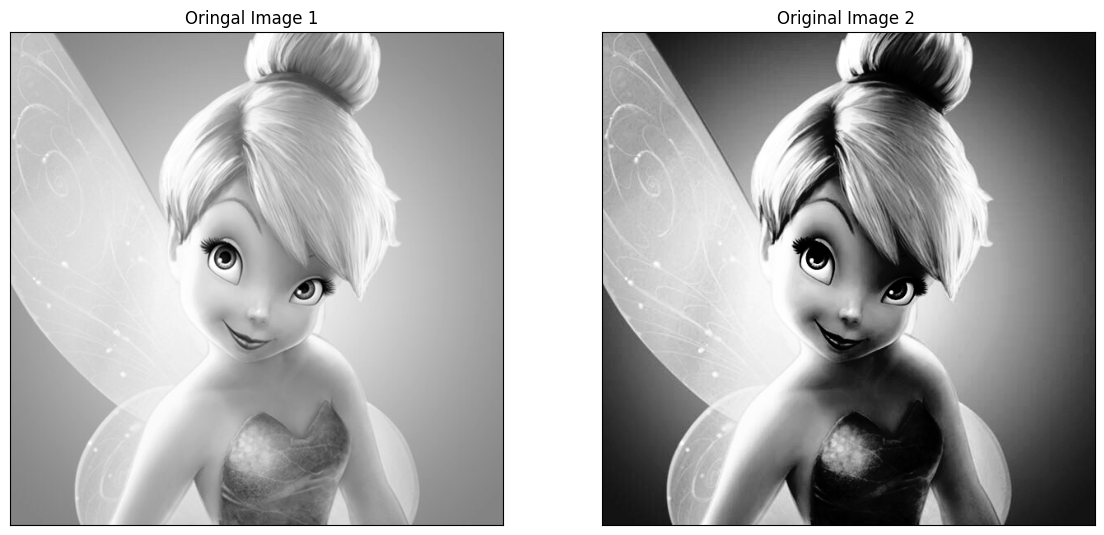

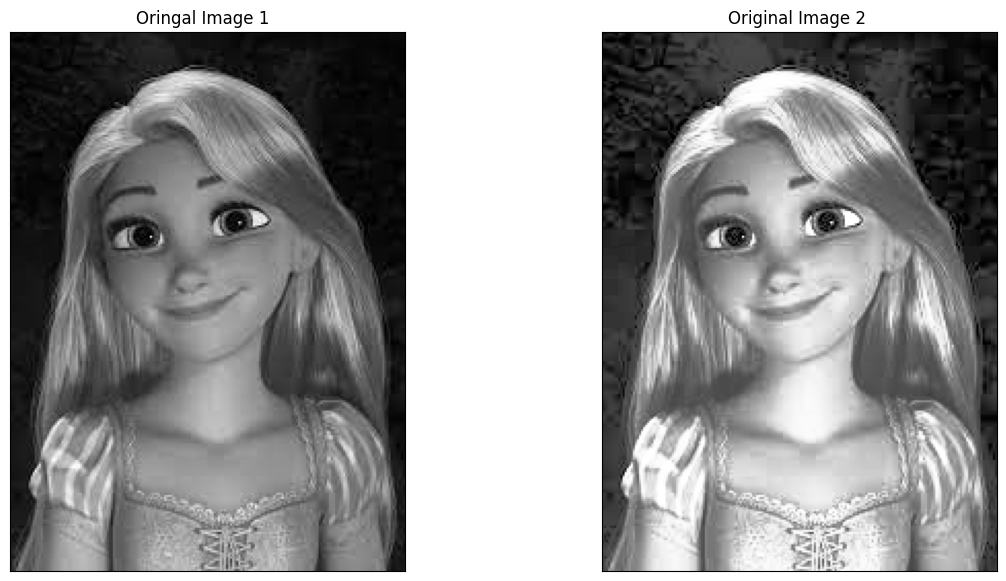

In [153]:
def contrastEnhancement(image):
    grayed_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    contrast_image = cv2.equalizeHist(grayed_image)


    # displaying all 5 images in a row
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    axes[0].imshow(grayed_image,cmap='gray')
    axes[0].set_title('Oringal Image 1  '), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(contrast_image,cmap='gray')
    axes[1].set_title('Original Image 2 '), axes[1].set_xticks([]), axes[1].set_yticks([]);


    return contrast_image
contrasted_tink = contrastEnhancement(tinky_file)
contrasted = contrastEnhancement(rapunzel_file)



#### Color enhancement

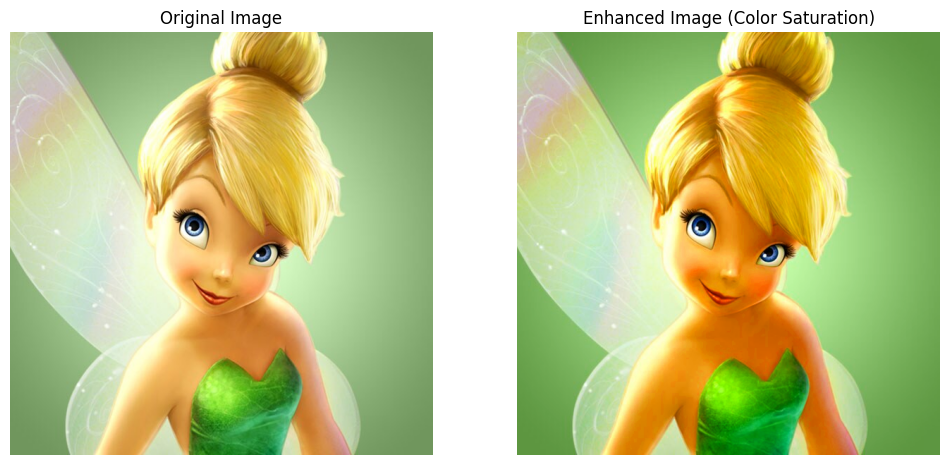

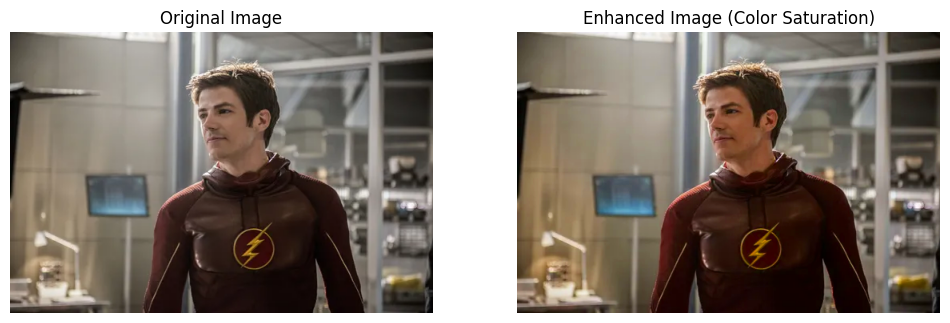

In [154]:
def colorEnhancement(img):
    image = cv2.imread(img)

        # grayed_image = cv2.imread(tinky_file, cv2.IMREAD_GRAYSCALE)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    saturation_factor = 1.5 # chat gpt helped me understand how the saturation factor works
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * saturation_factor, 0, 255).astype(np.uint8)

    enhanced_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image (Color Saturation)')
    plt.axis('off')

    plt.show()
colorEnhancement(tinky_file)
colorEnhancement(flash_file)


#### Color shift

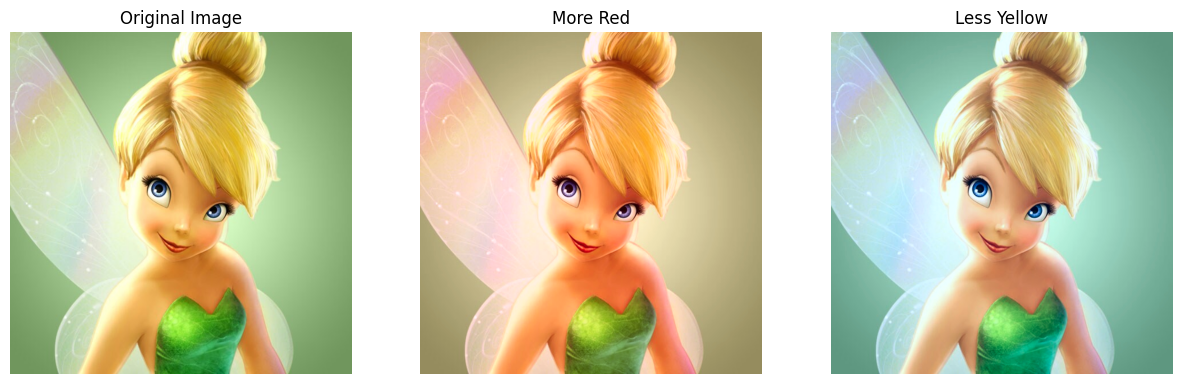

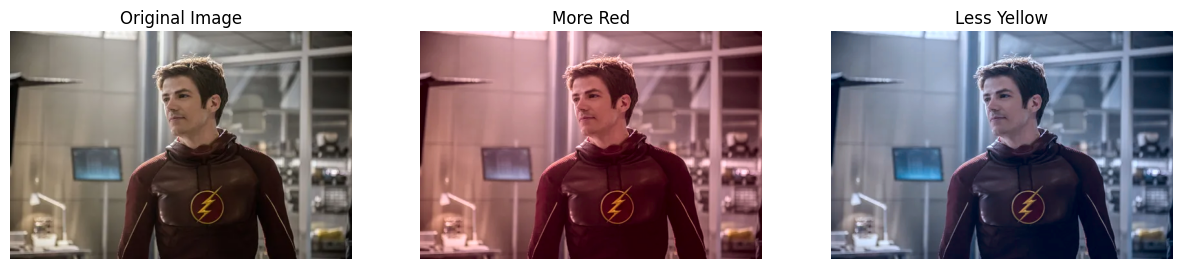

In [155]:
def colorShift(img):
    image = cv2.imread(img)
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

    more_red_image = lab_image.copy()
    less_yellow_image = lab_image.copy()

    # chat gpt helped me understand how to write this part of the code
    more_red_image[:, :, 1] = np.clip(more_red_image[:, :, 1] + 20, 0, 255).astype(np.uint8)
    less_yellow_image[:, :, 2] = np.clip(less_yellow_image[:, :, 2] - 20, 0, 255).astype(np.uint8)

    more_red_image_bgr = cv2.cvtColor(more_red_image, cv2.COLOR_Lab2BGR)
    less_yellow_image_bgr = cv2.cvtColor(less_yellow_image, cv2.COLOR_Lab2BGR)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(more_red_image_bgr, cv2.COLOR_BGR2RGB))
    plt.title('More Red')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(less_yellow_image_bgr, cv2.COLOR_BGR2RGB))
    plt.title('Less Yellow')
    plt.axis('off')

    plt.show()

colorShift(tinky_file)
colorShift(flash_file)

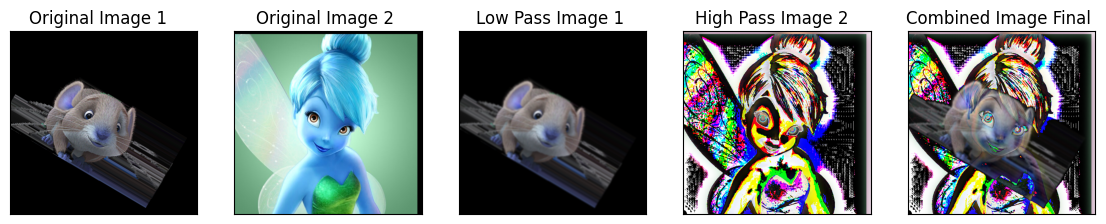

In [156]:
image1 = cv2.imread(cheese_file)
image2 = cv2.imread(tinky_file)


# Check if the image is loaded successfully

# Convert the image to LAB color space
# cheese_color = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
# tinky_color = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


sigma_low = 2 # choose parameters that work for your images
sigma_high = 15

cheese_tinky_hybrid1 = hybridImage(cheese_colored, tinky_colored, sigma_low, sigma_high)
# cat_hermione_hybrid1 = hybridImage(cat_colored, hermione_colored, sigma_low, sigma_high)